# Imports

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## sklearn

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Data

In [2]:
filename = 'data/diamonds.csv'

In [3]:
n = sum(1 for line in open(filename)) - 1
s = 2000
skip = sorted(random.sample(range(1, n+1), n-s))
df = pd.read_csv(filename, skiprows=skip, index_col=0)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
33,0.23,Very Good,E,VS1,60.7,59.0,402,3.97,4.01,2.42
34,0.23,Very Good,E,VS1,59.5,58.0,402,4.01,4.06,2.40
52,0.23,Ideal,G,VS1,61.9,54.0,404,3.93,3.95,2.44
54,0.22,Premium,E,VS2,61.6,58.0,404,3.93,3.89,2.41


In [72]:
X_num = df.iloc[:, [0, 4, 5, 6, 7, 8]].copy()

,carat,depth,table,price,x,y
13,0.22,60.4,61.0,342,3.88,3.84
33,0.23,60.7,59.0,402,3.97,4.01
34,0.23,59.5,58.0,402,4.01,4.06
52,0.23,61.9,54.0,404,3.93,3.95
54,0.22,61.6,58.0,404,3.93,3.89


In [73]:
y = X_num.pop('price')
y.head()

13    342
33    402
34    402
52    404
54    404
Name: price, dtype: int64

In [74]:
X_num.head()

,carat,depth,table,x,y
13,0.22,60.4,61.0,3.88,3.84
33,0.23,60.7,59.0,3.97,4.01
34,0.23,59.5,58.0,4.01,4.06
52,0.23,61.9,54.0,3.93,3.95
54,0.22,61.6,58.0,3.93,3.89


In [7]:
X_cat = df.iloc[:, [1, 2, 3]].copy()
X_cat.head()

,cut,color,clarity
13,Premium,F,SI1
33,Very Good,E,VS1
34,Very Good,E,VS1
52,Ideal,G,VS1
54,Premium,E,VS2


## Column Definitions

carat (num): weight in carats (1 carat = 200 mg) (0.2--5.01)

cut (cat): quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color (cat): diamond color (J (worst) -- D (best))

clarity (cat): how obvious inclusions are within the diamond (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

depth (num): height of diamond, measured from the culet (bottom tip) to the table (top), divided by its average girdle (widest dimension) diameter = z / mean(x, y) (43--79)

table (num): width of diamond's table (top) expressed as a percentage of its average diameter

price (num): price in US dollars (326--18,823)

x (num): length in mm (0--10.74)

y (num): width in mm (0--58.9)

z (num): depth in mm (0--31.8)

# Diamond Dimensions
<img src = 'data/diamondanatomyimproved.jpg'>

## EDA

### Data Distributions

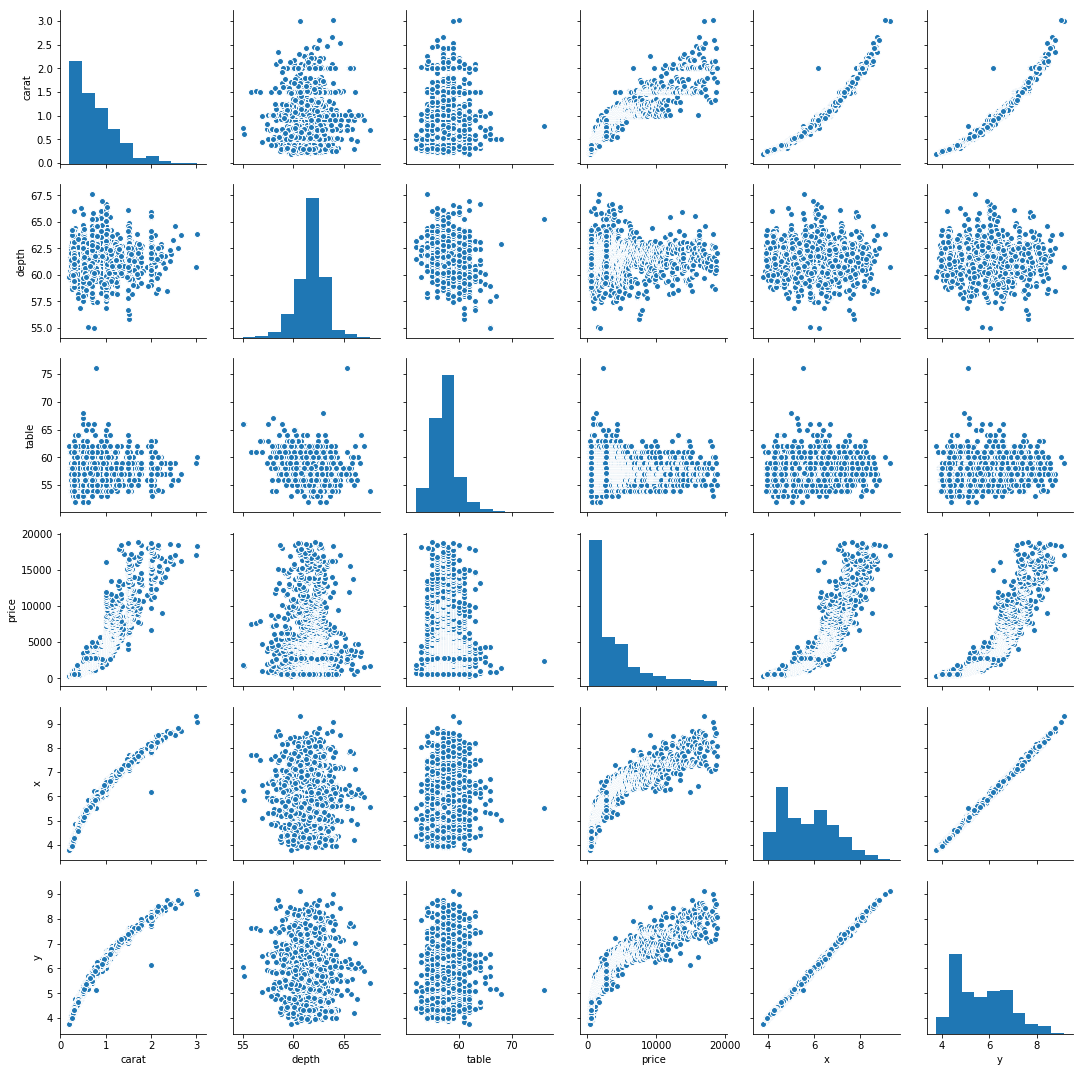

In [9]:
sns.pairplot(df);

## Variable Distributions

### Carat Distribution

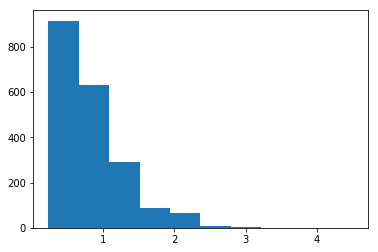

In [32]:
plt.hist(df['carat']);

### Price Distribution

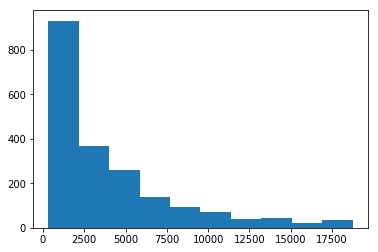

In [34]:
plt.hist(df['price']);

## Feature Relationship

### Carat vs x

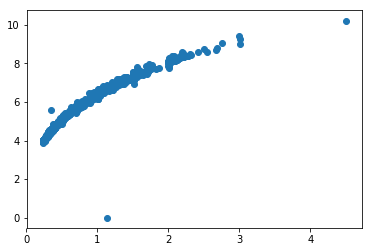

In [36]:
plt.scatter(df['carat'], df['x']);

### Carat vs y

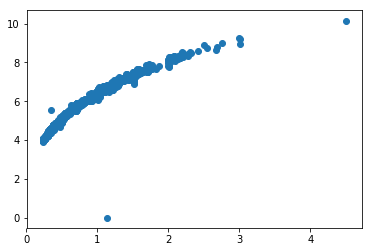

In [37]:
plt.scatter(df['carat'], df['y']);

### Carat vs z

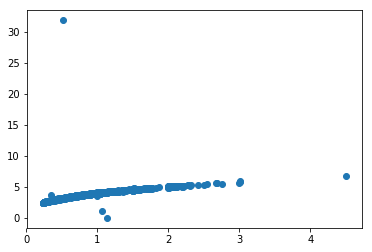

In [38]:
plt.scatter(df['carat'], df['z']);

## Feature-Target Plots

### Carat vs Price

Text(0,0.5,'Price ($)')

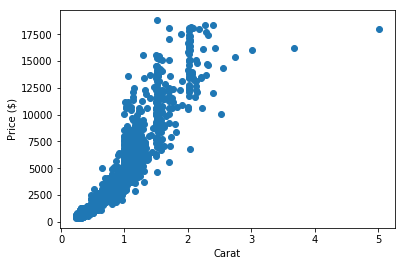

In [12]:
plt.scatter(df['carat'], df['price'])
plt.xlabel('Carat')
plt.ylabel('Price ($)')

# Pre-processing

## Categorical Data

### One-Hot Encoding

In [11]:
X_cat_enc = pd.get_dummies(X_cat)
X_cat_enc.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
33,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
34,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
52,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
54,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


### Oridnal

In [84]:
X_cat_ord = X_cat.copy()

In [85]:
cut_ord = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_ord = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_ord = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
ord_list = [cut_ord, color_ord, clarity_ord]

In [86]:
# replace string feature labels with ordinal values
for i, column in enumerate(X_cat_ord.columns):
    
    # create label dictionary for each categorical feature
    label_dict = {}
    for j, label in enumerate(ord_list[i]):
        # map each label to ordinal value
        label_dict[label] = j
    
    # replace feature labels with ordinal values
    X_cat_ord[column] = X_cat_ord[column].map(label_dict)

In [87]:
X_cat.head()

,cut,color,clarity
13,Premium,F,SI1
33,Very Good,E,VS1
34,Very Good,E,VS1
52,Ideal,G,VS1
54,Premium,E,VS2


In [88]:
X_cat_ord.head()

,cut,color,clarity
13,3,4,2
33,2,5,4
34,2,5,4
52,4,3,4
54,3,5,3


## Combine Numerical and Categorical Features

In [112]:
X = pd.concat([X_num, X_cat_enc], axis=1)
X.head()

,carat,depth,table,x,y,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
13,0.22,60.4,61.0,3.88,3.84,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
33,0.23,60.7,59.0,3.97,4.01,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
34,0.23,59.5,58.0,4.01,4.06,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
52,0.23,61.9,54.0,3.93,3.95,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
54,0.22,61.6,58.0,3.93,3.89,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Test/Train Split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize Data

In [114]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

## Normalize Data

In [99]:
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

# Modeling

In [115]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Cross-validation

In [116]:
np.mean(cross_val_score(lin_reg, X_train, y_train, cv=10))

0.9200713317450276

## Evaluation

In [117]:
lin_reg.score(X_test_std, y_test)

0.9117029914359164